### Notebook to plot all the necessary descriptives in time

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import time
from importlib import reload

In [2]:
summary_descriptives = pd.read_csv('C:/Users/Tesista/Desktop/Evasion/01_analisis/03_datos/05_SUMMARY/DescriptivesSummary.csv', sep=';', encoding = 'latin-1')

In [3]:
summary_descriptives

Unnamed: 0        date  total_raw_trx  total_trx  total_turns_trx  \
0             0  2017-03-01        2329229    2210399            48762   
1             1  2017-03-02        2369991    2332086            54086   
2             2  2017-03-03        2448178    2410476            53944   
3             3  2017-03-04        1533875    1508121            36319   
4             4  2017-03-05         982153     964519            22593   
5             5  2017-03-07        2567943    2529902            56546   
6             6  2017-03-09        2574321    2535246            55117   
7             7  2017-03-11        1569253    1544112            34153   
8             8  2017-03-12         934524     916257            19436   
9             9  2017-03-13        2619641    2576017            54775   
10           10  2017-03-14        2631775    2591725            57461   
11           11  2017-03-15        2651580    2612985            58405   
12           12  2017-03-16        2626301    2589603            56091   
13           13  2017-03-17        2693979    2655897            58491   
14           14  2017-03-18        1604069    1581390            35427   
15           15  2017-03-19         961332     946001            21630   
16           16  2017-03-26         923031     907516            20193   
17           17  2017-04-08        1625077    1601186            51812   
18           18  2017-04-09        1002360     985155            32802   
19           19  2017-04-10         148909     147128             4482   
20           20  2017-04-11        2638646    2598131            81795   
21           21  2017-04-12        2716557    2678999            88269   
22           22  2017-04-14         896460     881941            33399   
23           23  2017-04-15        1056945    1042224            38679   
24           24  2017-04-16         856867     843144            30066   
25           25  2017-04-17           2693       2661              113   
26           26  2017-04-18        2698888    2663162            91493   
27           27  2017-04-19         501898     492686            19105   
28           28  2017-04-20        2499160    2467613            92062   
29           29  2017-04-22        1665516    1643198            69000   
..          ...         ...            ...        ...              ...   
92           92  2017-07-13        2255119    2222618           262492   
93           93  2017-07-14        2397835    2365475           282506   
94           94  2017-07-15        1204703    1172039           154356   
95           95  2017-07-16         896973     880471           119664   
96           96  2017-07-18        2309572    2272834           273053   
97           97  2017-07-19        2361310    2326044           279098   
98           98  2017-08-01        2572131    2537705           306214   
99           99  2017-08-02        2631814    2598079           312287   
100         100  2017-08-03        2649748    2611706           310101   
101         101  2017-08-04        2686827    2652695           319805   
102         102  2017-08-05        1729925    1704217           218455   
103         103  2017-08-06        1059312    1041040           140106   
104         104  2017-08-08        2716177    2679443           325873   
105         105  2017-08-09        2689935    2653409           319696   
106         106  2017-08-11        2481848    2446062           297015   
107         107  2017-08-12        1594853    1568982           203040   
108         108  2017-08-13         881973     865252           117234   
109         109  2017-08-14        2237982    2208055           268741   
110         110  2017-08-15        1077368    1058365           142742   
111         111  2017-08-17        2712003    2668607           323346   
112         112  2017-08-18        2735614    2697415           329039   
113         113  2017-08-19        1635281    1610455           208157   
114      

In [4]:
dates = summary_descriptives['date']
dates = [dt.datetime.strptime(x, "%Y-%m-%d").date() for x in dates]

In [5]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

In [6]:
turnstile_means = summary_descriptives['turnstile_means']
no_turnstile_means = summary_descriptives['no_turnstile_means']

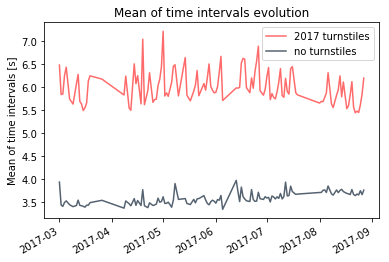

In [10]:
outlier_1 = dt.date(2017,4,10)
outlier_2 = dt.date(2017,4,17)

new_dates = [x for x in dates if ((x!=outlier_1)&(x!=outlier_2))]                                  
new_turnstile_means = [x for x in turnstile_means if x<15]
new_no_turnstile_means = [x for x in no_turnstile_means if x<15]

fig, ax_1 = plt.subplots()

ax_1.plot(new_dates,new_turnstile_means, color = colors [3], label='2017 turnstiles')
ax_1.plot(new_dates,new_no_turnstile_means, color = colors [0], label='no turnstiles')

fig.autofmt_xdate()
ax_1.legend()

ax_1.set_title('Mean of time intervals evolution')
ax_1.set_ylabel('Mean of time intervals [s]')

plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/7_meansEvolutionInTime.pdf')

In [ ]:
outlier_1 = dt.date(2017,4,10)
outlier_2 = dt.date(2017,4,17)

new_dates = [x for x in dates if ((x!=outlier_1)&(x!=outlier_2))]
new_turnstile_means = [x for x in turnstile_means if x<15]
new_no_turnstile_means = [x for x in no_turnstile_means if x<15]

fig, ax_1 = plt.subplots()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())

ax_1.plot(dates,total_raw_trx, color = colors[1], label='total-trx')


fig.autofmt_xdate()
#ax_1.legend()
ax_1.set_title('Total trx in time')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_meansEvolutionInTime.pdf')

* Omitting weekends

In [ ]:
weekend = set([5, 6])

week_dates = []
week_raw_trx = []

for x, y in zip(dates, total_raw_trx):
    if (x.weekday() not in weekend):
        week_dates.append(x)
        week_raw_trx.append(y)

* Adding a binary variable in summary ddbb indicating weekend nature

* There are more outliers to be filtered in trxs data. Consider to analyze them in detail

In [ ]:
total_raw_trx = summary_descriptives['total_raw_trx']

In [ ]:
outlier_1 = dt.date(2017,4,10)
outlier_2 = dt.date(2017,4,17)

#new_dates = [x for x in week_dates if ((x!=outlier_1)&(x!=outlier_2))]
#new_turnstile_means = [x for x in turnstile_means if x<15]
#new_no_turnstile_means = [x for x in no_turnstile_means if x<15]

fig, ax_1 = plt.subplots()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())

ax_1.plot(week_dates,week_raw_trx, color = colors[1], label='week - total-trx')


fig.autofmt_xdate()
#ax_1.legend()
ax_1.set_title('Total trx in time')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_meansEvolutionInTime.pdf')

In [ ]:
clean_week_dates = []
clean_week_raw_trx =[]

for x, y in zip(week_dates, week_raw_trx):
    if (y>1500000):
        clean_week_dates.append(x)
        clean_week_raw_trx.append(y)
        

In [ ]:
#outlier_1 = dt.date(2017,4,10)
#outlier_2 = dt.date(2017,4,17)

#new_dates = [x for x in week_dates if ((x!=outlier_1)&(x!=outlier_2))]
#new_turnstile_means = [x for x in turnstile_means if x<15]
#new_no_turnstile_means = [x for x in no_turnstile_means if x<15]

fig, ax_1 = plt.subplots()
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d/%m/%Y'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator())

ax_1.plot(clean_week_dates,clean_week_raw_trx, color = colors[1], label='week - total-trx')


fig.autofmt_xdate()
#ax_1.legend()
ax_1.set_title('Total trx in time')

#plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/6_meansEvolutionInTime.pdf')